In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [3]:
np.random.seed(0)

In [4]:
num_points = 500
X, y = datasets.make_circles(n_samples=num_points, 
                             random_state=123, 
                             noise=0.1, 
                             factor=0.2)

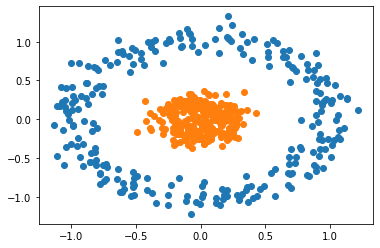

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

This data is not linearly separable.

In [6]:
model = Sequential()

model.add(Dense(4, input_shape=(2, ), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 528us/step - loss: 0.7360 - accuracy: 0.4861
Epoch 2/100
25/25 [==============================] - 0s 540us/step - loss: 0.6933 - accuracy: 0.4540
Epoch 3/100
25/25 [==============================] - 0s 527us/step - loss: 0.6895 - accuracy: 0.6497
Epoch 4/100
25/25 [==============================] - 0s 539us/step - loss: 0.6876 - accuracy: 0.7101
Epoch 5/100
25/25 [==============================] - 0s 542us/step - loss: 0.6887 - accuracy: 0.5685
Epoch 6/100
25/25 [==============================] - 0s 522us/step - loss: 0.6852 - accuracy: 0.4729
Epoch 7/100
25/25 [==============================] - 0s 514us/step - loss: 0.6834 - accuracy: 0.8195
Epoch 8/100
25/25 [==============================] - 0s 510us/step - loss: 0.6787 - accuracy: 0.8626
Epoch 9/100
25/25 [==============================] - 0s 516us/step - loss: 0.6744 - accuracy: 0.8468
Epoch 10/100
25/25 [==============================] - 0s 532us/step - loss: 0.6675 - accura

25/25 [==============================] - 0s 504us/step - loss: 0.0312 - accuracy: 1.0000
Epoch 82/100
25/25 [==============================] - 0s 521us/step - loss: 0.0283 - accuracy: 1.0000
Epoch 83/100
25/25 [==============================] - 0s 522us/step - loss: 0.0290 - accuracy: 1.0000
Epoch 84/100
25/25 [==============================] - 0s 510us/step - loss: 0.0262 - accuracy: 1.0000
Epoch 85/100
25/25 [==============================] - 0s 502us/step - loss: 0.0287 - accuracy: 1.0000
Epoch 86/100
25/25 [==============================] - 0s 509us/step - loss: 0.0267 - accuracy: 1.0000
Epoch 87/100
25/25 [==============================] - 0s 501us/step - loss: 0.0231 - accuracy: 1.0000
Epoch 88/100
25/25 [==============================] - 0s 505us/step - loss: 0.0253 - accuracy: 1.0000
Epoch 89/100
25/25 [==============================] - 0s 506us/step - loss: 0.0242 - accuracy: 1.0000
Epoch 90/100
25/25 [==============================] - 0s 504us/step - loss: 0.0230 - accuracy: 

Text(0.5, 1.0, 'accuracy')

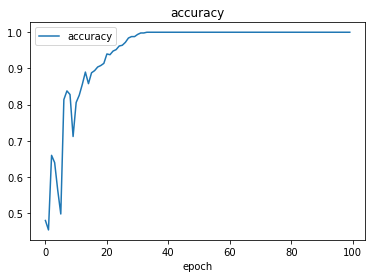

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

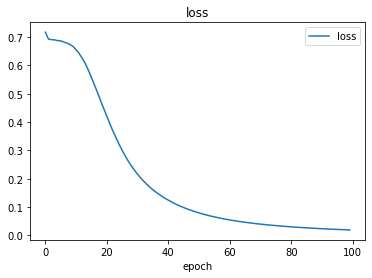

In [9]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [10]:
def plot_decision_boundary(X, y, model):
    tolerance = 0.25
    x_span = np.linspace(min(X[:, 0]) - tolerance, max(X[:, 0]) + tolerance, 50)
    y_span = np.linspace(min(X[:, 1]) - tolerance, max(X[:, 1]) + tolerance, 50)

    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()    
    grid = np.c_[xx_, yy_]
    
    predictions = model.predict(grid)
    
    z = predictions.reshape(xx.shape)
    
    plt.contourf(xx, yy, z)

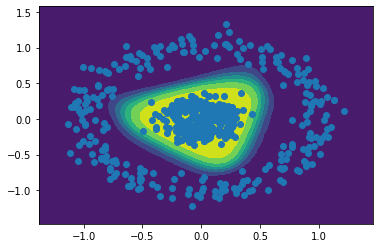

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:num_points,0], X[:num_points,1])
plt.scatter(X[num_points:,0], X[num_points:,1])

Prediction is: [[0.9911705]]


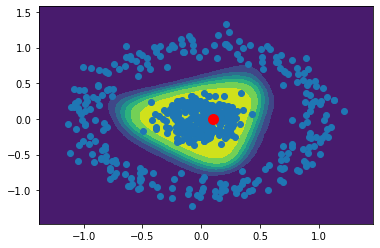

In [12]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:num_points,0], X[:num_points,1])
plt.scatter(X[num_points:,0], X[num_points:,1])

x = 0.1
y = 0
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color='red')
print("Prediction is:", prediction)